#### importing libraries

In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier


#### imprting data 

In [2]:
df=pd.read_excel(r'E:\csv_datas\movix solutions\sample-data\internbuddy_data_v1.xlsx')
warnings.filterwarnings('ignore')
df.head()

,Application_ID,Current City,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),...,Node.js (out of 3),ReactJS (out of 3),Other skills,Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,ML0001,Bangalore,0,2,0,2,0,2,3,2,...,0,0,R Programming,Bachelor of Science (B.Sc),Mathematics,2017,NaN,NaN,NaN,NaN
1,ML0002,Bangalore,2,0,0,2,2,2,2,2,...,0,0,"Data Science, Machine Learning, Neural Network...",Bachelor of Technology (B.Tech),Computer Science & Engineering,2019,NaN,85.50/100,92.20/92.20,96.60/96.60
2,ML0003,Bangalore,3,0,1,2,2,2,0,2,...,0,0,"Algorithms, Data Structures, Python, C Program...",Master of Science (M.Sc),Computer Science,2018,7.91/10,70.00/100,64.83/64.83,77.60/77.60
3,ML0004,Bangalore,2,0,2,1,0,2,0,0,...,0,0,"CSS, Deep Learning, Embedded Systems, HTML, Ma...",Bachelor of Engineering (B.E),Electronics and Communication,2019,NaN,6.86/10,76.00/76.00,84.32/84.32
4,ML0005,Bangalore,2,0,0,2,0,2,1,1,...,2,2,"HTML, OpenCV, Python, SQL, C++ Programming, CS...",Bachelor of Technology (B.Tech),Production Engineering,2018,NaN,6.38/10,65.20/65.20,68.80/68.80


####  data cleaning

In [3]:
drop_cols=['Application_ID','Current City','Performance_12','Performance_10','Unnamed: 10','Other skills','Stream','Degree','Current Year Of Graduation']
df.drop(drop_cols,axis=1,inplace=True)
df.head()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Performance_PG,Performance_UG
0,0,2,0,2,0,2,3,2,0,2,0,0,0,NaN,NaN
1,2,0,0,2,2,2,2,2,0,0,0,0,0,NaN,85.50/100
2,3,0,1,2,2,2,0,2,0,0,0,0,0,7.91/10,70.00/100
3,2,0,2,1,0,2,0,0,0,0,0,0,0,NaN,6.86/10
4,2,0,0,2,0,2,1,1,0,0,2,2,2,NaN,6.38/10


#### filling the null values 

In [4]:
df.Performance_PG.fillna('0',inplace=True)
df.Performance_UG.fillna('0',inplace=True)
df.head()

,Python (out of 3),R Programming (out of 3),Deep Learning (out of 3),PHP (out of 3),MySQL (out of 3),HTML (out of 3),CSS (out of 3),JavaScript (out of 3),AJAX (out of 3),Bootstrap (out of 3),MongoDB (out of 3),Node.js (out of 3),ReactJS (out of 3),Performance_PG,Performance_UG
0,0,2,0,2,0,2,3,2,0,2,0,0,0,0,0
1,2,0,0,2,2,2,2,2,0,0,0,0,0,0,85.50/100
2,3,0,1,2,2,2,0,2,0,0,0,0,0,7.91/10,70.00/100
3,2,0,2,1,0,2,0,0,0,0,0,0,0,0,6.86/10
4,2,0,0,2,0,2,1,1,0,0,2,2,2,0,6.38/10


In [5]:
df.isnull().sum()

Python (out of 3)           0
R Programming (out of 3)    0
Deep Learning (out of 3)    0
PHP (out of 3)              0
MySQL (out of 3)            0
HTML (out of 3)             0
CSS (out of 3)              0
JavaScript (out of 3)       0
AJAX (out of 3)             0
Bootstrap (out of 3)        0
MongoDB (out of 3)          0
Node.js (out of 3)          0
ReactJS (out of 3)          0
Performance_PG              0
Performance_UG              0
dtype: int64

#### marks of pg and ug are in diffrent grading schemes, converting them to a common grading scheme

In [6]:
for i in range(len(df)):
    if df.Performance_PG[i]!='0':
        a=RegexpTokenizer('[0-9.]+').tokenize(df.Performance_PG[i])
        if a[1]=='10':
            df.Performance_PG[i]=float(a[0])*9.5
        elif a[1]=='100':
            df.Performance_PG[i]=float(a[0])
        elif a[1]=='4':
            df.Performance_PG[i]=(float(a[0])*100)/4
        elif a[1]=='5':
            df.Performance_PG[i]=(float(a[0])*100)/5
        else:
            df.Performance_PG[i]=(float(a[0])*7)/4
        

In [7]:
for i in range(len(df)):
    if df.Performance_UG[i]!='0':
        a=RegexpTokenizer('[0-9.]+').tokenize(df.Performance_UG[i])
        if a[1]=='10':
            df.Performance_UG[i]=float(a[0])*9.5
        elif a[1]=='100':
            df.Performance_UG[i]=float(a[0])
        elif a[1]=='4':
            df.Performance_UG[i]=(float(a[0])*100)/4
        elif a[1]=='5':
            df.Performance_UG[i]=(float(a[0])*100)/5
        else:
            df.Performance_UG[i]=(float(a[0])*7)/4


In [8]:
df=df.convert_objects(convert_numeric=True)
df.columns=['Python', 'R Programming','Deep Learning', 'PHP', 'MySQL','HTML', 'CSS', 'JavaScript','AJAX', 'Bootstrap', 'MongoDB','Node.js', 'ReactJS', 'Performance_PG','Performance_UG']

#### creating a target feature based on the criterias given

In [9]:
target=[]
for i in range(len(df)):
    if df.Python[i]+df['R Programming'][i]+df['Deep Learning'][i]>=3:
        if df.Performance_PG[i]>60 or df.Performance_PG[i]>60:
            target.append('data')
        else:
            target.append('no')
    elif df.PHP[i]+df.MySQL[i]+df.HTML[i]+df.CSS[i]+df.JavaScript[i]+df.AJAX[i]+df.Bootstrap[i]+df.MongoDB[i]+df['Node.js'][i]+df.ReactJS[i]>=10:
        if df.Performance_PG[i]>60 or df.Performance_PG[i]>60:
            target.append('web')
        else:target.append('no')
    else:
        target.append('no')
target=pd.DataFrame({"Target":target})
x=df.values
y=pd.get_dummies(target,drop_first=True)

#### scaling and splitting the data into training and testing data

In [10]:
x=StandardScaler().fit_transform(x)


In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

#### training diffrent machine learning models and checking the accuracy

#### decision tree

In [17]:
dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(xtrain,ytrain)
ypred_dt=dt.predict(xtest)
score=accuracy_score(ypred_dt,ytest)
score

0.9745762711864406

#### k-nearest neighbors

In [13]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)
accuracy_score(ypred,ytest)

0.923728813559322

#### random forest

In [16]:
rd=RandomForestClassifier(n_estimators=500)
rd.fit(xtrain,ytrain)
ypred_rd=rd.predict(xtest)
accuracy_score(ypred_rd,ytest)

0.9661016949152542

####  decision tree gives most accuracy ie, 97.4% Therfore it is chosen

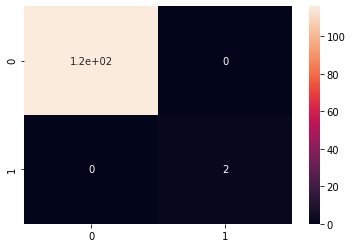

In [18]:
cm=confusion_matrix(np.argmax(np.array(ypred_dt),axis=1),np.argmax(np.array(ytest),axis=1))
sns.heatmap(cm,annot=True)